# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [204]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [205]:
# Display a description of the dataset
display(data.describe())
print(data.median())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Fresh               8504.0
Milk                3627.0
Grocery             4755.5
Frozen              1526.0
Detergents_Paper     816.5
Delicatessen         965.5
dtype: float64


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [206]:
# TODO: Select three indices of your choice you wish to sample from the dataset

indices = [21,33,243]

#testing for outliers
#indices = [95, 338]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,5567,871,2010,3383,375,569
1,29729,4786,7326,6130,361,1083
2,11210,3576,5119,561,1682,2398


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**
The first customer looks like it would be a small cafe.  Perhaps the type that is in a business office.  I would think this because all of the quantities are near or below the 25% percentile except frozen.  So I'm guessing they don't have a lot of space to prepare a ton of food so they rely on frozen food, which would mesh with what a small cafe in an industrial setting.
The second customer could be a small sized restaurant chain with multiple locations.  They have ordered well over the 75th percentile in fresh products, and over the 50th in all other food categories. 
The third customer would be a single average restaurant that serves healthier food and deli sandwiches. Their quantities are close to the mean in most categories but frozen, paper and delicatessan. Perhaps their sandwiches are all wrapped in paper.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [207]:
from sklearn.model_selection import train_test_split
from sklearn import tree

features = data.keys()
scores = {}

for feature in features:
    
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    new_data = data.drop([feature], axis = 1)

# TODO: Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data, data[feature], test_size=.25, random_state=7)

# TODO: Create a decision tree regressor and fit it to the training set
    regressor = tree.DecisionTreeRegressor().fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    scores[feature] = score

print(scores)

{'Grocery': 0.5299327993330194, 'Frozen': -2.3829512978100809, 'Delicatessen': -1.4739323270306022, 'Detergents_Paper': 0.70430159838301154, 'Fresh': -0.38857594159625441, 'Milk': -2.2120006758449136}


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**
I went ahead and tried them all. The r^2 was negative for most, meaning that the model could not fit the data. For detergents the r^2 was almost .7, so that feature might not be useful for identifying customers spending.  Grocery also had a positive R^2, but the result only explained about half of the variability of the data.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

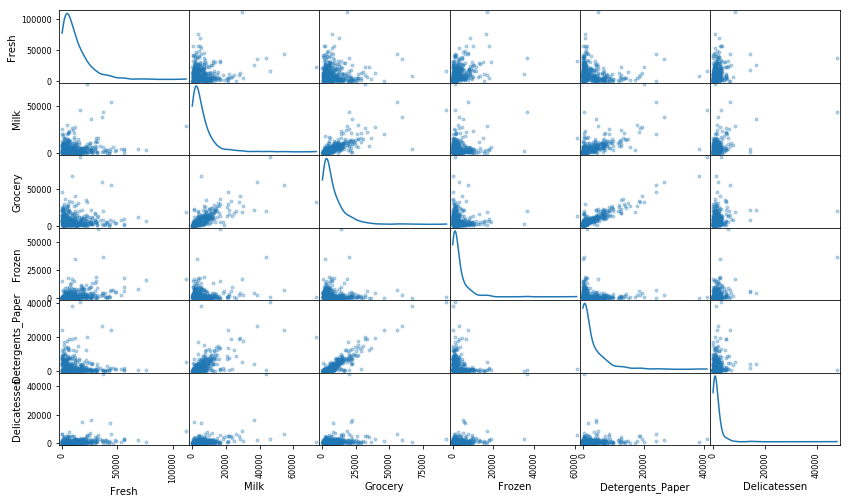

In [208]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**
There are some features which seem to be positively correlated.  Those would include grocery and deteregent/paper and milk and grocery.  This does confirm the results above that deteregent might not be as useful a feature as the others and that grocery also can be somewhat predicted by the combination of the other features.  In general, that data for each feature does not seem to be normally distributed.  Most of the features are right skewed with long tails. Looking at the means and medians above also confirms this distribution.  Perhaps the skew is due to some mega-large, big box store style, outlier customers. 

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

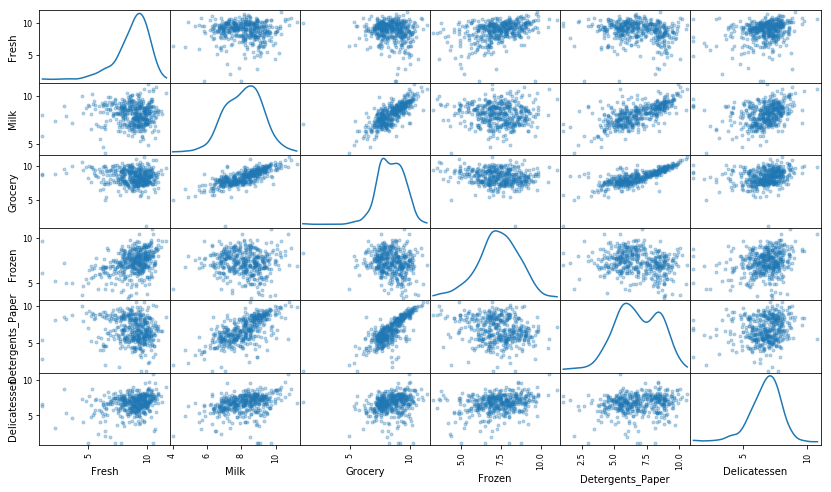

In [209]:
# TODO: Scale the data using the natural logarithm
log_data = data.applymap(np.log)

# TODO: Scale the sample data using the natural logarithm
log_samples = samples.applymap(np.log)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [223]:
# Display the log-transformed sample data
display(log_samples)

display(log_data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.624612,6.769642,7.605890,8.126518,5.926926,6.34388
1,10.299878,8.473450,8.899185,8.720950,5.888878,6.98749
2,9.324562,8.182000,8.540714,6.329721,7.427739,7.78239


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,8.730544,8.121047,8.441169,7.301396,6.785972,6.665133
std,1.480071,1.081365,1.116172,1.284540,1.721020,1.310832
min,1.098612,4.007333,1.098612,3.218876,1.098612,1.098612
25%,8.048059,7.334981,7.674616,6.609678,5.548101,6.011875
50%,9.048286,8.196159,8.467057,7.330388,6.705018,6.872645
75%,9.737064,8.880480,9.273854,8.175896,8.274341,7.506728
max,11.627601,11.205013,11.437986,11.016479,10.617099,10.777768


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [211]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25)
    
    # TOD: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3 - Q1) * 1.5
    
    #For debugging
    print("Feature: " + feature)
    print("Q1: " + str(Q1))
    print("Q3: " + str(Q3))
    print("step: " + str(step))
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
#Choosing to remove outliers with the log values of 1.09 or the actual value of 3.  These all share the same value
# and it may be a typo.  Either way it is very far below the rest of the points and oddly common across all features
outliers  = [95,338,75,161,109,128,142,187]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Feature: Fresh
Q1: 8.04805870221
Q3: 9.73706394795
step: 2.53350786861
Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Feature: Milk
Q1: 7.33498124004
Q3: 8.88048008859
step: 2.31824827282
Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Feature: Grocery
Q1: 7.67461620137
Q3: 9.27385367724
step: 2.3988562138
Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Feature: Frozen
Q1: 6.60967774917
Q3: 8.17589608318
step: 2.34932750101
Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Feature: Detergents_Paper
Q1: 5.54810142479
Q3: 8.27434059875
step: 4.08935876094
Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Feature: Delicatessen
Q1: 6.01187465693
Q3: 7.50672842655
step: 2.24228065442
Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**
There are a few data points that are outliers on more than one feature. 75 was an outlier on two features (grocery and detergents) and 154 was an outlier on three features (milk, grocery and deli). Alone that isn't reason enough to remove them. I think one of the only valid reasons to remove an outlier is in the case where the data is actually invalid. I found the log value of 1.0986 to be oddly consistent among outliers and looked into the actual value.  For all of these the actual value was 3.  This seemed like an odd amount to be found in multiple customers - especially considering how far of an outlier it was.  I believe this might be an invalid value - either a typo or some other kind of entry error - and chose to remove all customers that had that as on of their data elements. 

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

Components: [[ 0.18427804 -0.40792583 -0.44466427  0.1745498  -0.73828814 -0.16240318]
 [-0.64372822 -0.18700788 -0.09210345 -0.5493709  -0.02404733 -0.48966553]
 [-0.73795712  0.06661764 -0.04036835  0.44481463 -0.19331336  0.46273282]
 [ 0.08351228  0.08547337  0.00168013 -0.68343024 -0.32980264  0.6402113 ]
 [-0.00820103  0.73659688  0.29685275  0.02679027 -0.50858655 -0.33144867]
 [-0.00577265 -0.4942732   0.83906892  0.04548974 -0.2226033  -0.00157222]]
Untransformed samples:        Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0   8.624612  6.769642  7.605890  8.126518          5.926926       6.34388
1  10.299878  8.473450  8.899185  8.720950          5.888878       6.98749
2   9.324562  8.182000  8.540714  6.329721          7.427739       7.78239
Transformed samples: [[ 1.77490459  0.17510593  0.42364547 -0.63439378 -0.64410043  0.19606991]
 [ 0.8408341  -1.98185516 -0.18174742 -0.32834338  0.80305079  0.46391426]
 [-0.74321189 -0.37906536 -0.46026004  1.20

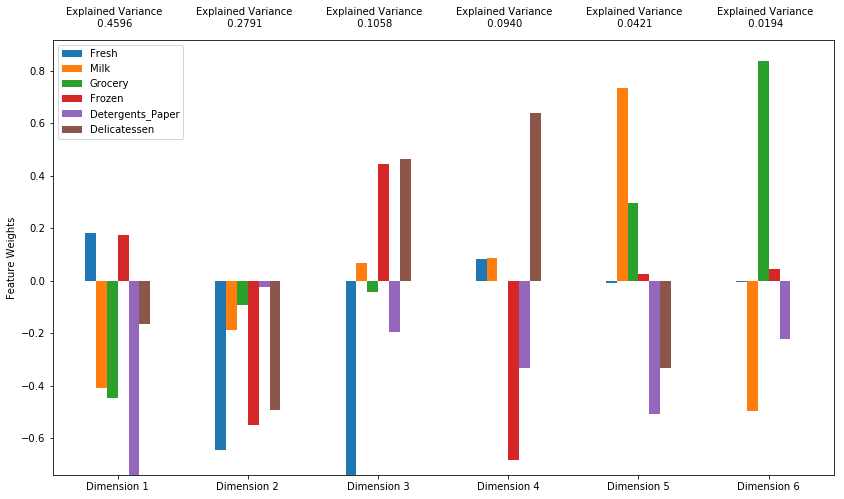

In [212]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=6).fit(good_data)
print("Components: " + str(pca.components_))

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)
print("Untransformed samples: " + str(log_samples))
print("Transformed samples: " + str(pca_samples))

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**
The first two PCA components explain 73.9% of the variance in the data.  Add all four components together, about 94% of the variance is explained. Regarding what the PCA components are describing, each component is trying to maximize variance and minimize information loss among the features.  The feature weights are what we would apply to our data to transform it into the principal component.  Because most of the correlation is negative in the first dimension, it mostly represents a lack of purchases of detergent, grocery and milk while at the same time purchasing fresh and frozen items.  The second dimension is all negative correlations, which represents primarily a lack of purchasing fresh, frozen and deli goods. The third component is a mix of strong positive and negative correlations, representing customers who purchase very little fresh goods but a large amount of frozen and deli products. Finally the fourth component represent customers who purchase a lot of deli products but very little frozen products.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [213]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,1.7749,0.1751,0.4236,-0.6344,-0.6441,0.1961
1,0.8408,-1.9819,-0.1817,-0.3283,0.8031,0.4639
2,-0.7432,-0.3791,-0.4603,1.2003,-0.6202,-0.1398


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [224]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [225]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,1.7749,0.1751
1,0.8408,-1.9819
2,-0.7432,-0.3791


## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

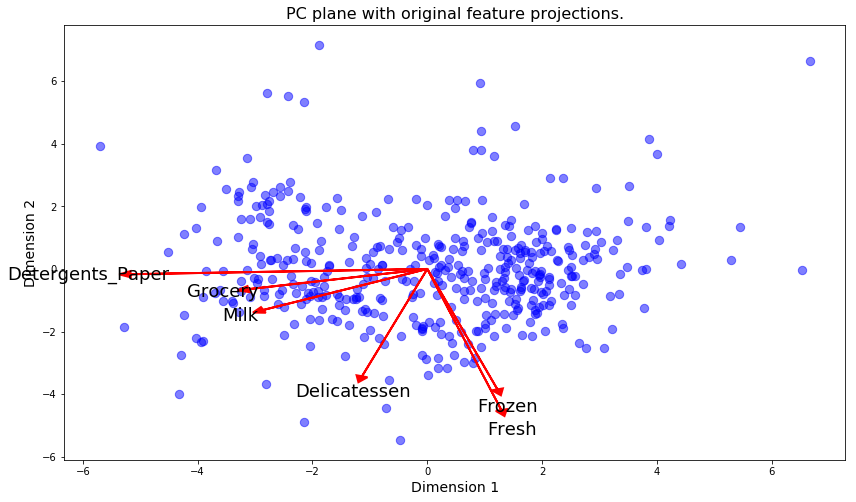

In [226]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**
K-Means has some definite advantages as a clustering algorithm.  One of the biggest is that it is usually fast and efficient, and it is easy to interpret the clustering results. It also works very well if the cluters are spherical. It also works really well with large datasets. The Gaussian Mixture algorithm has its own advantages, including the ability to "soft" cluster and it can work with any distribution. Ultimately I would lean toward using GMM based on the fact that we don't have a huge dataset, I don't think the clusters will be spherical, and looking at the correlations of our features I think there may be some covariance among the clusters. Also, we have all numeric, normalized data points as features which I think will work well with GMM. In reality I am going to try them both for practice, but I think GMM is the better option for this problem.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

        GMM        KM
0  0.424824  0.427458


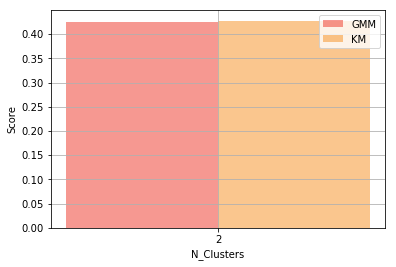

In [217]:
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

n_clusters = [2]
#n_clusters = [r for r in range(2,12)]
gm_scores = []
km_scores = []
scores_dict = {}

# TODO: Apply your clustering algorithm of choice to the reduced data 
for num in n_clusters:
    gmm_cl = GaussianMixture(n_components=num).fit(reduced_data)
    km_cl = KMeans(n_clusters=num).fit(reduced_data)

# TODO: Predict the cluster for each data point
    gm_preds = gmm_cl.predict(reduced_data)
    km_preds = km_cl.predict(reduced_data)

# TODO: Find the cluster centers
    gm_centers = gmm_cl.means_
    km_centers = km_cl.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
    gm_sample_preds = gmm_cl.predict(pca_samples)
    km_sample_preds = km_cl.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
    score_gm = silhouette_score(reduced_data, gm_preds)
    gm_scores.append(score_gm)
    score_km = silhouette_score(reduced_data, km_preds)
    km_scores.append(score_km)

scores_dict['GMM'] = gm_scores
scores_dict['KM'] = km_scores

scores_data = pd.DataFrame(scores_dict)
print(scores_data)

fig = plt.figure()
ax = plt.subplot(111)
ax.bar([pos-.2 for pos in n_clusters],gm_scores,alpha=0.5,color='#EE3224',width=.4, align='center')
ax.bar([pos+.2 for pos in n_clusters],km_scores, alpha=0.5,color='#F78F1E', width=.4, align='center')
ax.set_xticks([pos for pos in n_clusters])
ax.set_xticklabels(n_clusters)
ax.set_ylabel('Score')
ax.set_xlabel('N_Clusters')
plt.legend(['GMM', 'KM'], loc='upper right')
plt.grid()
plt.show()



### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**
algo  clusters    scores
0   GMM         2  0.424824
1   GMM         3  0.374346
2   GMM         4  0.311489
3   GMM         5  0.260853
4   GMM         6  0.323286
5   GMM         7  0.343505
6   GMM         8  0.249012
7   GMM         9  0.297970
8   GMM        10  0.282505
9    KM         2  0.427458
10   KM         3  0.386449
11   KM         4  0.333284
12   KM         5  0.353298
13   KM         6  0.372591
14   KM         7  0.367469
15   KM         8  0.350387
16   KM         9  0.366266
17   KM        10  0.353423

2 clusters has the best silhouette score. NOTE: This looks best in editing mode.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

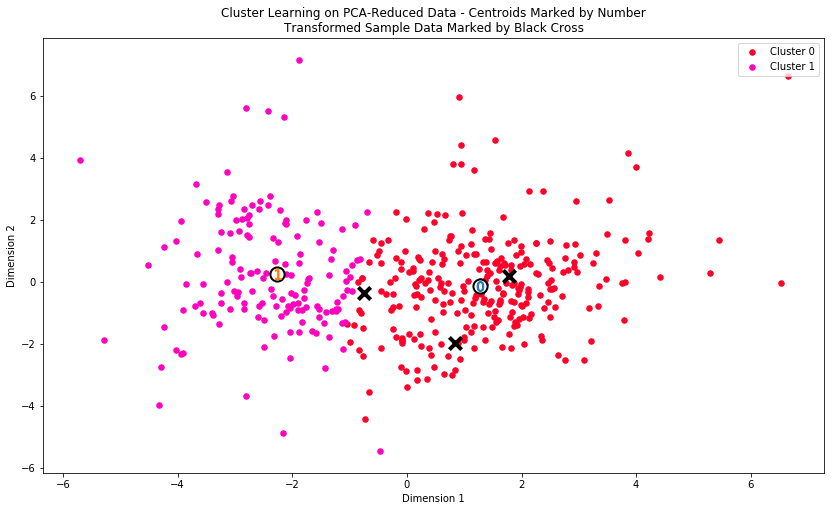

In [218]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, gm_preds, gm_centers, pca_samples)

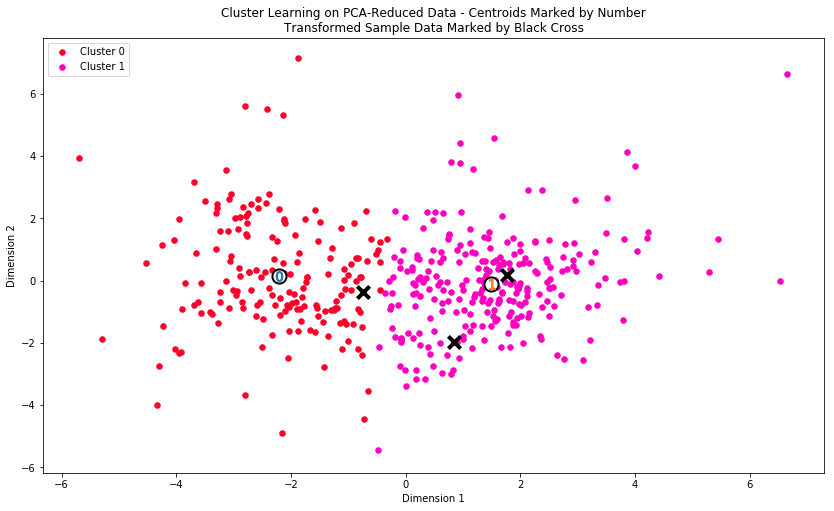

In [219]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, km_preds, km_centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [220]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(gm_centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(gm_centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8865.0,2058.0,2704.0,1984.0,363.0,715.0
Segment 1,3650.0,8170.0,12660.0,875.0,4935.0,1064.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**
It looks to me like there are two very distinct types of customers here. Segement 0 is buying a huge (relative) amount of grocery products and detergents/paper.  I would think these would be grocery stores buying from a wholesaler.  The other category (Segment 1) has a much higher proportion of fresh products, which would indicate they use them rather quickly - kind of like a restaurant. So I think these would break into grocery stores/markets and restaurants.

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [221]:
# Display the predictions
for i, pred in enumerate(gm_sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


**Answer:**
All of my samples were predicted to be in the restaurant category. Based on my analysis above, these seems pretty accurate. They are very different types of restaurants, but all in that cateogry.

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
The change would definitely not affect all customers equally. There are such different types of customers included here that it is impossible to assume that. We only have two segments, but it seems that the restaurant segment would be less receptive to this change as they are buying much more fresh food and probably don't have the storage capacity or ability to not get fresh food nearly every day.  A large grocery store probably wouldn't mind not paying people to unload the goods 5 days a week and a 3 day schedule might be better for them.  One way to think about what customers it might hurt the most are those buying the largest proportion of fresh food, things that don't last a long time.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**
To do this, we could take the original data and the customer segment and train a learner - perhaps something like logistic regression because we only have two variables - to be able to predict based on amounts what segment a customer would fall into.  So the target variable would be customer segment and the feature variables would be the estimated spending in each category.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

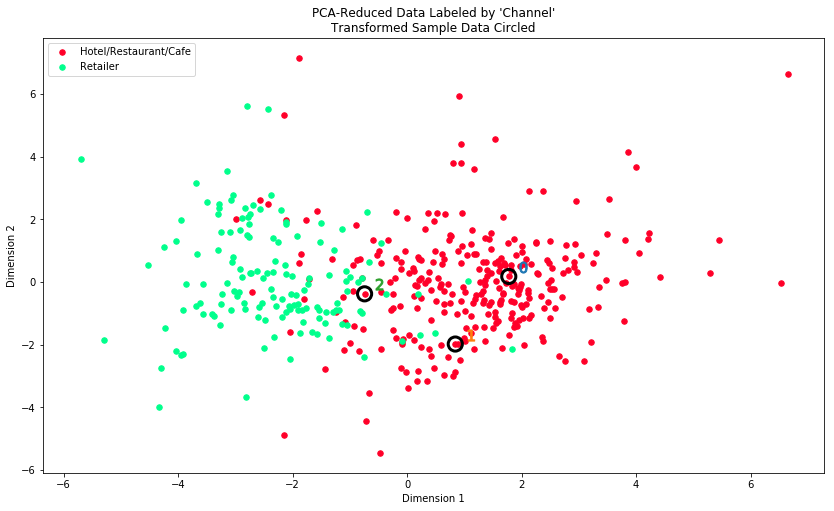

In [222]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**
The clustering algorithm and results compare very nicely to this distribution.  Although there is some cross over - I'd imagine some very large restaurants or chaings and some very small markets - for the most part the division in half nearly linearly down the center breaks apart the two segments. In my original analysis I identified grocery stores as the retailer segment and restaurants as the hotel/restaurant/cafe segment. That plays out here.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.